In [16]:
import os
import sys
import tensorflow as tf

directory_path = os.path.abspath(os.path.join('../src'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

from NsgaII import Nsga_II
from utils.load_data import load_fashion_mnist
from CapsNet import CapsNet

(X_train, y_train), (X_test , y_test) = load_fashion_mnist(size=(5000, 3000))

In [17]:
import json
with open('../saved_ga/mnist-gpu1-hpc-0/solutions.json') as file:
    solutions = json.load(file)
    params = solutions['Solution 1']['params']

# params = {'epochs': 5, 'r': 2, 'no_of_conv_kernels': 64, 'secondary_capsule_vector': 6, 'dense_1': 256, 'dense_2': 512, 'epsilon': 0.08411185848750914, 'm_plus': 0.9504174153527706, 'm_minus': 0.1648052052496743, 'lambda_': 0.6831030565866469, 'alpha': 0.006858184909559632, 'no_of_primary_capsules': 32, 'primary_capsule_vector': 8, 'no_of_secondary_capsules': 10}

print(params)
NasCapsNet = CapsNet(**params)
NasCapsNet._name = 'NasCapsNet'
NasCapsNet.compile()
NasCapsNet.summary()

{'epochs': 5, 'r': 2, 'no_of_conv_kernels': 128, 'secondary_capsule_vector': 28, 'dense_1': 512, 'dense_2': 256, 'epsilon': 0.032718346473582065, 'm_plus': 0.9752763125589023, 'm_minus': 0.14967730718933103, 'lambda_': 0.6322226126173243, 'alpha': 0.009385138481216327, 'no_of_primary_capsules': 32, 'primary_capsule_vector': 8, 'no_of_secondary_capsules': 10}
Model: "NasCapsNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  0 (unused)
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  0 (unused)
                                                                 
 dense_6 (Dense)             multiple                  0 (unused)
                                                                 
 dense_7 (Dense)             multiple                  0 (unused)
                         

In [18]:
NasCapsNet.fit(X_train, y_train, tf.keras.optimizers.legacy.Adam(), train_metrics=['accuracy'], validation=(X_test, y_test))

Epoch 5/5: 100%|██████████| 79/79 [00:25<00:00,  3.04it/s]

Validation loss is not decreasing anymore, risk of overfitting the model after 5 epochs. The training will be stopped. This behavior can be modified by setting the early_stop property of the model to False


{'accuracy': ListWrapper([0.7918, 0.8196, 0.8584, 0.875]),
 'loss': ListWrapper([0.5431957542896271, 0.2998359268531203, 0.2574932062998414, 0.23184160236269236]),
 'val_accuracy': ListWrapper([0.7636666666666667, 0.7863333333333333, 0.8236666666666667, 0.8393333333333334]),
 'val_loss': ListWrapper([0.3487975103780627, 0.2962274244055152, 0.2657694276422262, 0.24255611933767796])}

In [19]:
n_rounds = 100

import time

caps_nas_inv_time = []
for i in range(n_rounds):
    start = time.time()
    NasCapsNet.predict(X_test)
    end = time.time()
    caps_nas_inv_time.append((end - start) / len(X_test) * 1000)
caps_nas_inv_time

[1.0157363414764404,
 1.0095025698343914,
 1.0352176825205486,
 1.0368516445159912,
 1.1852242946624756,
 1.296441634496053,
 1.1248209476470947,
 1.0336009661356609,
 1.0315473874409993,
 1.1141032377878826,
 1.1314647197723389,
 1.0639400482177734,
 1.0040656725565593,
 1.0012667179107666,
 1.2761629422505696,
 1.0723437468210855,
 1.1221381028493245,
 1.0617533524831135,
 1.1979612509409587,
 1.2388573487599692,
 1.8278380235036213,
 1.1891563733418782,
 1.0553566614786785,
 1.1343416372934978,
 0.9702730178833008,
 1.3606159687042236,
 1.3548643589019775,
 1.248866319656372,
 1.1930970350901287,
 1.0087566375732422,
 1.0659530957539876,
 1.0211457411448162,
 1.0099997520446777,
 1.0322869618733725,
 1.0209147135416667,
 1.0413046677907307,
 1.0534439881642659,
 1.096997578938802,
 1.0780583222707112,
 1.0314210255940754,
 0.987424373626709,
 1.0342846711476645,
 1.110917568206787,
 1.0303672949473064,
 0.996475617090861,
 1.017711559931437,
 1.0056829452514648,
 1.1621921062469482,

In [20]:
params = {
    "epochs": 10,
    "epsilon": 1e-7,
    "m_minus": 0.1,
    "m_plus": 0.9,
    "lambda_": 0.5,
    "alpha": 0.0005,
    "no_of_conv_kernels": 128,
    "no_of_primary_capsules": 32,
    "no_of_secondary_capsules": 10,
    "primary_capsule_vector": 8,
    "secondary_capsule_vector": 16,
    "r":3,
    "dense_1": 512,
    "dense_2": 1024
}

BaselineCapsNetModel = CapsNet(**params)
BaselineCapsNetModel._name = 'BaselineCapsNetModel'
BaselineCapsNetModel.compile()
BaselineCapsNetModel.summary()

Model: "BaselineCapsNetModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  0 (unused)
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  0 (unused)
                                                                 
 dense_8 (Dense)             multiple                  0 (unused)
                                                                 
 dense_9 (Dense)             multiple                  0 (unused)
                                                                 
Total params: 1,474,560
Trainable params: 1,474,560
Non-trainable params: 0
_________________________________________________________________


In [21]:
BaselineCapsNetModel.fit(X_train, y_train, tf.keras.optimizers.legacy.Adam(), train_metrics=['accuracy'], validation=(X_test, y_test))

Epoch 8/10: 100%|██████████| 79/79 [00:26<00:00,  2.99it/s]

Validation loss is not decreasing anymore, risk of overfitting the model after 8 epochs. The training will be stopped. This behavior can be modified by setting the early_stop property of the model to False


{'accuracy': ListWrapper([0.7964, 0.8428, 0.853, 0.8742, 0.8908, 0.9002, 0.9142]),
 'loss': ListWrapper([0.44003608636558056, 0.2326789777725935, 0.19274669466540217, 0.1736475620418787, 0.1562377787195146, 0.14487112639471889, 0.13114147586748004]),
 'val_accuracy': ListWrapper([0.7683333333333333, 0.8143333333333334, 0.822, 0.841, 0.8416666666666667, 0.8483333333333334, 0.852]),
 'val_loss': ListWrapper([0.2712431363761425, 0.22784392349421978, 0.22500765044242144, 0.19686364103108644, 0.1958739710971713, 0.1895608613267541, 0.18385143484920263])}

In [22]:
n_rounds = 100

import time

caps_inv_time = []
for i in range(n_rounds):
    start = time.time()
    BaselineCapsNetModel.predict(X_test)
    end = time.time()
    caps_inv_time.append((end - start) / len(X_test) * 1000)

In [23]:
ConvNetModel = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
ConvNetModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_10 (Dense)            (None, 100)               540900    
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

In [24]:
ConvNetModel.compile(tf.optimizers.legacy.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
tf_y_train = tf.keras.utils.to_categorical(y_train)
tf_y_test = tf.keras.utils.to_categorical(y_test)

In [25]:
history = ConvNetModel.fit(X_train, tf_y_train, epochs=10, batch_size=32, validation_data=(X_test, tf_y_test))

Epoch 1/10
157/157 [==============================] - 1s 7ms/step - loss: 0.7315 - accuracy: 0.7486 - val_loss: 0.5037 - val_accuracy: 0.8167
Epoch 2/10
157/157 [==============================] - 1s 6ms/step - loss: 0.4444 - accuracy: 0.8476 - val_loss: 0.4463 - val_accuracy: 0.8447
Epoch 3/10
157/157 [==============================] - 1s 6ms/step - loss: 0.3758 - accuracy: 0.8690 - val_loss: 0.4584 - val_accuracy: 0.8403
Epoch 4/10
157/157 [==============================] - 1s 7ms/step - loss: 0.3123 - accuracy: 0.8926 - val_loss: 0.4490 - val_accuracy: 0.8400
Epoch 5/10
157/157 [==============================] - 1s 6ms/step - loss: 0.2627 - accuracy: 0.9112 - val_loss: 0.3912 - val_accuracy: 0.8703
Epoch 6/10
157/157 [==============================] - 1s 6ms/step - loss: 0.2265 - accuracy: 0.9224 - val_loss: 0.4231 - val_accuracy: 0.8590
Epoch 7/10
157/157 [==============================] - 1s 6ms/step - loss: 0.1933 - accuracy: 0.9370 - val_loss: 0.4206 - val_accuracy: 0.8513
Epoch 

In [26]:
n_rounds = 100

import time

cnn_inv_time = []
for i in range(n_rounds):
    start = time.time()
    ConvNetModel.predict(X_test)
    end = time.time()
    cnn_inv_time.append((end - start) / len(X_test) * 1000)

94/94 [==============================] - 0s 1ms/step


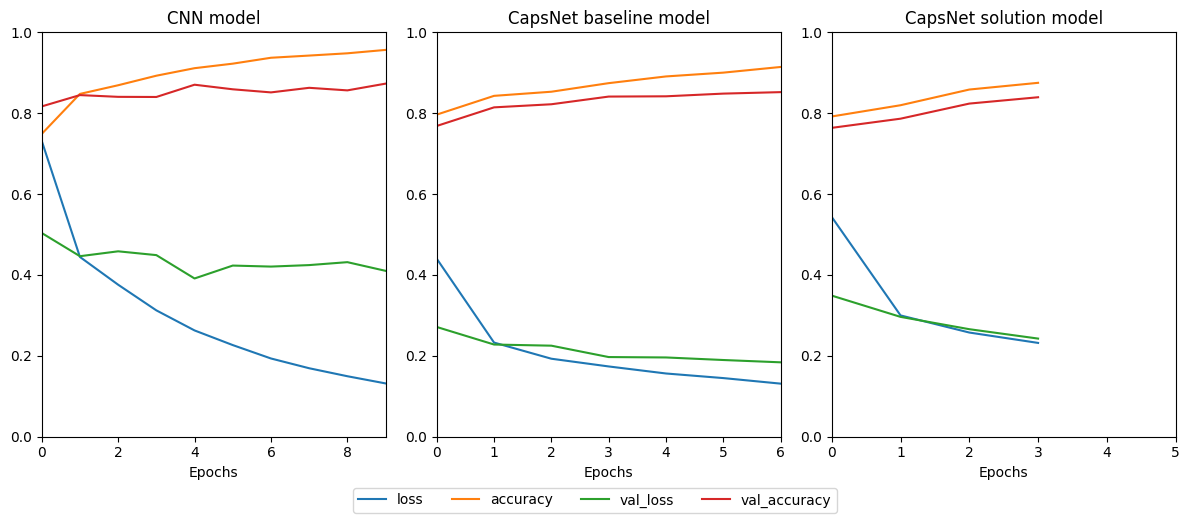

In [27]:
import matplotlib.pyplot as plt
import time
import pandas as pd

NasCapsNet.training_metrics = {
    'loss': NasCapsNet.training_metrics['loss'],
    'accuracy': NasCapsNet.training_metrics['accuracy'],
    'val_loss': NasCapsNet.training_metrics['val_loss'],
    'val_accuracy': NasCapsNet.training_metrics['val_accuracy'],
}

BaselineCapsNetModel.training_metrics = {
    'loss': BaselineCapsNetModel.training_metrics['loss'],
    'accuracy': BaselineCapsNetModel.training_metrics['accuracy'],
    'val_loss': BaselineCapsNetModel.training_metrics['val_loss'],
    'val_accuracy': BaselineCapsNetModel.training_metrics['val_accuracy'],
}

fig, axes = plt.subplots(1, 3, figsize=(12, 5))

df_baseline = pd.DataFrame(history.history)
plot_baseline = df_baseline.plot(ax=axes[0], title="CNN model", legend=False)
axes[0].set_ylim(0, 1)
axes[0].set_xlim(0, 9)

df_capsnet = pd.DataFrame(BaselineCapsNetModel.training_metrics)
plot_capsnet = df_capsnet.plot(ax=axes[1], title="CapsNet baseline model", legend=False)  # Set legend=False here
axes[1].set_ylim(0, 1)
axes[1].set_xlim(0, 6)

df_capsnet_nas = pd.DataFrame(NasCapsNet.training_metrics)
plot_capsnet_nas = df_capsnet_nas.plot(ax=axes[2], title="CapsNet solution model", legend=False)  # Set legend=False here
axes[2].set_ylim(0, 1)
axes[2].set_xlim(0, 5)

axes[0].set_xlabel("Epochs")
axes[1].set_xlabel("Epochs")
axes[2].set_xlabel("Epochs")

# Show only one legend for all three plots
handles, labels = axes[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), fancybox=True, ncol=4)

plt.tight_layout()
plt.show()


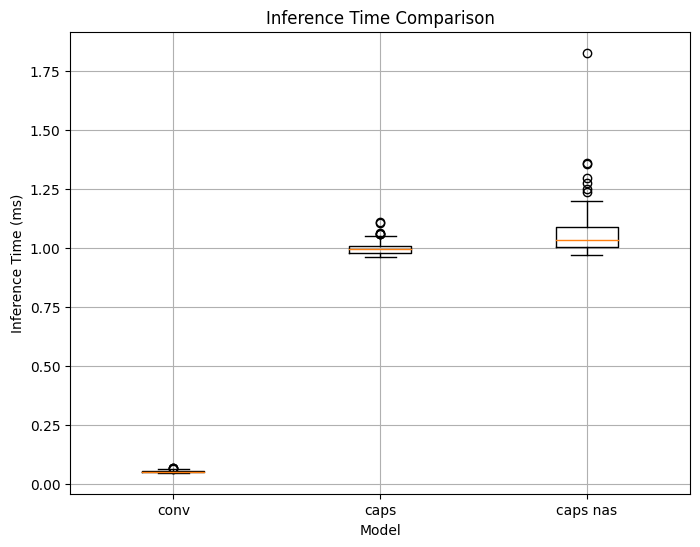

In [28]:
df = pd.DataFrame({
    "conv": cnn_inv_time,
    "caps": caps_inv_time,
    "caps nas": caps_nas_inv_time
})
plt.figure(figsize=(8, 6))
plt.boxplot(df.values, labels=df.columns)
plt.title('Inference Time Comparison')
plt.xlabel('Model')
plt.ylabel('Inference Time (ms)')
plt.grid(True)
plt.show()

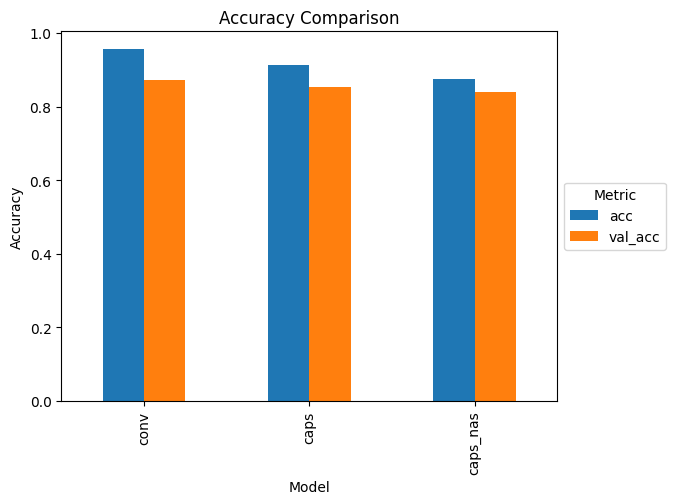

In [29]:
df = pd.DataFrame({
    'conv': {'acc': history.history['accuracy'][-1], 'val_acc': history.history['val_accuracy'][-1]},
    'caps': {'acc': BaselineCapsNetModel.training_metrics['accuracy'][-1], 'val_acc': BaselineCapsNetModel.training_metrics['val_accuracy'][-1]},
    'caps_nas': {'acc': NasCapsNet.training_metrics['accuracy'][-1], 'val_acc': NasCapsNet.training_metrics['val_accuracy'][-1]},
})

df = df.T
df.plot(kind='bar')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.legend(title='Metric', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()